# 导入库

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os
import sys
import time
from tensorflow import keras

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__ + "的版本为：" + module.__version__)

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib的版本为：3.0.3
numpy的版本为：1.16.2
pandas的版本为：0.25.3
sklearn的版本为：0.20.3
tensorflow的版本为：2.0.0
tensorflow_core.keras的版本为：2.2.4-tf


# 读入数据并查看部分内容

In [2]:
data = pd.read_csv('credit-a.csv', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [3]:
data.iloc[:, -1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

# 将数据最后一列的-1值转为0

In [4]:
data.iloc[:, -1].replace(-1, 0)

0      0
1      0
2      0
3      0
4      0
      ..
648    1
649    1
650    1
651    1
652    1
Name: 15, Length: 653, dtype: int64

# 设置x、y值

In [5]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

# 搭建模型

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape = (15,), activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))    # 逻辑回归，输出层的激活函数activation要为sigmoid
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


# 设置优化模型、损失函数

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])       
# 逻辑回归损失函数不能使用均方误差mse，使用交叉熵损失函数，本题使用二值交叉熵binary_crossentropy，显示正确率metrics=['acc']

# 模型训练

In [8]:
history = model.fit(x, y, epochs = 2000)

Train on 653 samples
Epoch 1/2000
653/653 [==============================] - 1s 2ms/sample - loss: 5.4984 - acc: 0.5145
Epoch 2/2000
653/653 [==============================] - 0s 60us/sample - loss: 4.7995 - acc: 0.5115
Epoch 3/2000
653/653 [==============================] - 0s 61us/sample - loss: 4.2086 - acc: 0.4870
Epoch 4/2000
653/653 [==============================] - 0s 57us/sample - loss: 4.1474 - acc: 0.4380
Epoch 5/2000
653/653 [==============================] - 0s 64us/sample - loss: 4.1128 - acc: 0.4533
Epoch 6/2000
653/653 [==============================] - 0s 67us/sample - loss: 4.0787 - acc: 0.4686
Epoch 7/2000
653/653 [==============================] - 0s 63us/sample - loss: 4.0314 - acc: 0.4778
Epoch 8/2000
653/653 [==============================] - 0s 69us/sample - loss: 3.9256 - acc: 0.4778
Epoch 9/2000
653/653 [==============================] - 0s 64us/sample - loss: 3.6154 - acc: 0.4717
Epoch 10/2000
653/653 [==============================] - 0s 61us/sample - loss: 

653/653 [==============================] - 0s 72us/sample - loss: 0.5190 - acc: 0.7443
Epoch 160/2000
653/653 [==============================] - 0s 64us/sample - loss: 0.5216 - acc: 0.7381
Epoch 161/2000
653/653 [==============================] - 0s 63us/sample - loss: 0.5180 - acc: 0.7458
Epoch 162/2000
653/653 [==============================] - 0s 61us/sample - loss: 0.5201 - acc: 0.7489
Epoch 163/2000
653/653 [==============================] - 0s 63us/sample - loss: 0.5202 - acc: 0.7397
Epoch 164/2000
653/653 [==============================] - 0s 67us/sample - loss: 0.5154 - acc: 0.7443
Epoch 165/2000
653/653 [==============================] - 0s 80us/sample - loss: 0.5150 - acc: 0.7412
Epoch 166/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.5164 - acc: 0.7427
Epoch 167/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.5184 - acc: 0.7519
Epoch 168/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.5124 - acc: 0.

653/653 [==============================] - 0s 81us/sample - loss: 0.3368 - acc: 0.8668
Epoch 320/2000
653/653 [==============================] - 0s 78us/sample - loss: 0.3304 - acc: 0.8683
Epoch 321/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.3361 - acc: 0.8668
Epoch 322/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.3306 - acc: 0.8729
Epoch 323/2000
653/653 [==============================] - 0s 66us/sample - loss: 0.3364 - acc: 0.8652
Epoch 324/2000
653/653 [==============================] - 0s 70us/sample - loss: 0.3424 - acc: 0.8606
Epoch 325/2000
653/653 [==============================] - 0s 107us/sample - loss: 0.3347 - acc: 0.8775
Epoch 326/2000
653/653 [==============================] - 0s 84us/sample - loss: 0.3490 - acc: 0.8622
Epoch 327/2000
653/653 [==============================] - 0s 83us/sample - loss: 0.3485 - acc: 0.8606
Epoch 328/2000
653/653 [==============================] - 0s 77us/sample - loss: 0.3464 - acc: 0

653/653 [==============================] - 0s 93us/sample - loss: 0.3263 - acc: 0.8790
Epoch 480/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.3214 - acc: 0.8698
Epoch 481/2000
653/653 [==============================] - 0s 80us/sample - loss: 0.3058 - acc: 0.8790
Epoch 482/2000
653/653 [==============================] - 0s 72us/sample - loss: 0.3027 - acc: 0.8760
Epoch 483/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.3145 - acc: 0.8760
Epoch 484/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.3092 - acc: 0.8790
Epoch 485/2000
653/653 [==============================] - 0s 95us/sample - loss: 0.3051 - acc: 0.8744
Epoch 486/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.3044 - acc: 0.8760
Epoch 487/2000
653/653 [==============================] - 0s 64us/sample - loss: 0.3066 - acc: 0.8775
Epoch 488/2000
653/653 [==============================] - 0s 118us/sample - loss: 0.3099 - acc: 0

653/653 [==============================] - 0s 84us/sample - loss: 0.3052 - acc: 0.8821
Epoch 560/2000
653/653 [==============================] - 0s 98us/sample - loss: 0.3045 - acc: 0.8775
Epoch 561/2000
653/653 [==============================] - 0s 109us/sample - loss: 0.3014 - acc: 0.8851
Epoch 562/2000
653/653 [==============================] - 0s 109us/sample - loss: 0.3014 - acc: 0.8790
Epoch 563/2000
653/653 [==============================] - 0s 138us/sample - loss: 0.3216 - acc: 0.8729
Epoch 564/2000
653/653 [==============================] - 0s 121us/sample - loss: 0.3089 - acc: 0.8806
Epoch 565/2000
653/653 [==============================] - 0s 144us/sample - loss: 0.3146 - acc: 0.8760
Epoch 566/2000
653/653 [==============================] - 0s 127us/sample - loss: 0.3095 - acc: 0.8806
Epoch 567/2000
653/653 [==============================] - 0s 100us/sample - loss: 0.3036 - acc: 0.8836
Epoch 568/2000
653/653 [==============================] - 0s 89us/sample - loss: 0.3016 - 

653/653 [==============================] - 0s 78us/sample - loss: 0.2966 - acc: 0.8851
Epoch 719/2000
653/653 [==============================] - 0s 72us/sample - loss: 0.3069 - acc: 0.8760
Epoch 720/2000
653/653 [==============================] - 0s 70us/sample - loss: 0.2970 - acc: 0.8882
Epoch 721/2000
653/653 [==============================] - 0s 75us/sample - loss: 0.3055 - acc: 0.8760
Epoch 722/2000
653/653 [==============================] - 0s 72us/sample - loss: 0.2916 - acc: 0.8851
Epoch 723/2000
653/653 [==============================] - 0s 70us/sample - loss: 0.2923 - acc: 0.8836
Epoch 724/2000
653/653 [==============================] - 0s 75us/sample - loss: 0.2996 - acc: 0.8806
Epoch 725/2000
653/653 [==============================] - 0s 70us/sample - loss: 0.2926 - acc: 0.8867
Epoch 726/2000
653/653 [==============================] - 0s 70us/sample - loss: 0.3010 - acc: 0.8744
Epoch 727/2000
653/653 [==============================] - 0s 70us/sample - loss: 0.2962 - acc: 0.

653/653 [==============================] - 0s 63us/sample - loss: 0.2890 - acc: 0.8836
Epoch 878/2000
653/653 [==============================] - 0s 60us/sample - loss: 0.3165 - acc: 0.8683
Epoch 879/2000
653/653 [==============================] - 0s 58us/sample - loss: 0.3028 - acc: 0.8790
Epoch 880/2000
653/653 [==============================] - 0s 60us/sample - loss: 0.3041 - acc: 0.8806
Epoch 881/2000
653/653 [==============================] - 0s 57us/sample - loss: 0.2919 - acc: 0.8851
Epoch 882/2000
653/653 [==============================] - 0s 237us/sample - loss: 0.2935 - acc: 0.8897
Epoch 883/2000
653/653 [==============================] - 0s 66us/sample - loss: 0.2958 - acc: 0.8851
Epoch 884/2000
653/653 [==============================] - 0s 70us/sample - loss: 0.2913 - acc: 0.8806
Epoch 885/2000
653/653 [==============================] - 0s 57us/sample - loss: 0.2896 - acc: 0.8867
Epoch 886/2000
653/653 [==============================] - 0s 66us/sample - loss: 0.2886 - acc: 0

653/653 [==============================] - 0s 60us/sample - loss: 0.2846 - acc: 0.8913
Epoch 958/2000
653/653 [==============================] - 0s 61us/sample - loss: 0.2901 - acc: 0.8821
Epoch 959/2000
653/653 [==============================] - 0s 57us/sample - loss: 0.2874 - acc: 0.8897
Epoch 960/2000
653/653 [==============================] - 0s 67us/sample - loss: 0.2883 - acc: 0.8867
Epoch 961/2000
653/653 [==============================] - 0s 57us/sample - loss: 0.2853 - acc: 0.8928
Epoch 962/2000
653/653 [==============================] - 0s 55us/sample - loss: 0.2904 - acc: 0.8867
Epoch 963/2000
653/653 [==============================] - 0s 57us/sample - loss: 0.2913 - acc: 0.8775
Epoch 964/2000
653/653 [==============================] - 0s 55us/sample - loss: 0.2920 - acc: 0.8913
Epoch 965/2000
653/653 [==============================] - 0s 57us/sample - loss: 0.2920 - acc: 0.8821
Epoch 966/2000
653/653 [==============================] - 0s 57us/sample - loss: 0.2865 - acc: 0.

653/653 [==============================] - 0s 77us/sample - loss: 0.3031 - acc: 0.8821
Epoch 1116/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2945 - acc: 0.8867
Epoch 1117/2000
653/653 [==============================] - 0s 80us/sample - loss: 0.2871 - acc: 0.8867
Epoch 1118/2000
653/653 [==============================] - 0s 77us/sample - loss: 0.2916 - acc: 0.8821
Epoch 1119/2000
653/653 [==============================] - 0s 75us/sample - loss: 0.2857 - acc: 0.8867
Epoch 1120/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2931 - acc: 0.8851
Epoch 1121/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.2881 - acc: 0.8821
Epoch 1122/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2935 - acc: 0.8760
Epoch 1123/2000
653/653 [==============================] - 0s 80us/sample - loss: 0.2917 - acc: 0.8790
Epoch 1124/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.2849 

653/653 [==============================] - 0s 69us/sample - loss: 0.2943 - acc: 0.8882
Epoch 1274/2000
653/653 [==============================] - 0s 66us/sample - loss: 0.2868 - acc: 0.8882
Epoch 1275/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.2826 - acc: 0.8882
Epoch 1276/2000
653/653 [==============================] - 0s 72us/sample - loss: 0.2860 - acc: 0.8867
Epoch 1277/2000
653/653 [==============================] - 0s 86us/sample - loss: 0.2877 - acc: 0.8836
Epoch 1278/2000
653/653 [==============================] - 0s 93us/sample - loss: 0.2943 - acc: 0.8851
Epoch 1279/2000
653/653 [==============================] - 0s 89us/sample - loss: 0.2856 - acc: 0.8882
Epoch 1280/2000
653/653 [==============================] - 0s 93us/sample - loss: 0.2936 - acc: 0.8882
Epoch 1281/2000
653/653 [==============================] - 0s 83us/sample - loss: 0.2889 - acc: 0.8806
Epoch 1282/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2863 

653/653 [==============================] - 0s 93us/sample - loss: 0.2846 - acc: 0.8897
Epoch 1431/2000
653/653 [==============================] - 0s 98us/sample - loss: 0.2819 - acc: 0.8867
Epoch 1432/2000
653/653 [==============================] - 0s 78us/sample - loss: 0.2808 - acc: 0.8897
Epoch 1433/2000
653/653 [==============================] - 0s 92us/sample - loss: 0.2883 - acc: 0.8913
Epoch 1434/2000
653/653 [==============================] - 0s 84us/sample - loss: 0.2882 - acc: 0.8806
Epoch 1435/2000
653/653 [==============================] - 0s 77us/sample - loss: 0.3205 - acc: 0.8760
Epoch 1436/2000
653/653 [==============================] - 0s 83us/sample - loss: 0.3277 - acc: 0.8744
Epoch 1437/2000
653/653 [==============================] - 0s 75us/sample - loss: 0.3124 - acc: 0.8683
Epoch 1438/2000
653/653 [==============================] - 0s 80us/sample - loss: 0.3052 - acc: 0.8867
Epoch 1439/2000
653/653 [==============================] - 0s 75us/sample - loss: 0.2936 

653/653 [==============================] - 0s 78us/sample - loss: 0.2850 - acc: 0.8790
Epoch 1589/2000
653/653 [==============================] - 0s 72us/sample - loss: 0.2812 - acc: 0.8897
Epoch 1590/2000
653/653 [==============================] - 0s 66us/sample - loss: 0.2832 - acc: 0.8851
Epoch 1591/2000
653/653 [==============================] - 0s 66us/sample - loss: 0.2829 - acc: 0.8867
Epoch 1592/2000
653/653 [==============================] - 0s 61us/sample - loss: 0.2837 - acc: 0.8821
Epoch 1593/2000
653/653 [==============================] - 0s 70us/sample - loss: 0.2816 - acc: 0.8928
Epoch 1594/2000
653/653 [==============================] - 0s 67us/sample - loss: 0.2842 - acc: 0.8867
Epoch 1595/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.2815 - acc: 0.8836
Epoch 1596/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2802 - acc: 0.8897
Epoch 1597/2000
653/653 [==============================] - 0s 64us/sample - loss: 0.2884 

653/653 [==============================] - 0s 80us/sample - loss: 0.2979 - acc: 0.8851
Epoch 1747/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2919 - acc: 0.8913
Epoch 1748/2000
653/653 [==============================] - 0s 77us/sample - loss: 0.2913 - acc: 0.8851
Epoch 1749/2000
653/653 [==============================] - 0s 67us/sample - loss: 0.2968 - acc: 0.8851
Epoch 1750/2000
653/653 [==============================] - 0s 61us/sample - loss: 0.3120 - acc: 0.8744
Epoch 1751/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2912 - acc: 0.8928
Epoch 1752/2000
653/653 [==============================] - 0s 87us/sample - loss: 0.2892 - acc: 0.8882
Epoch 1753/2000
653/653 [==============================] - 0s 83us/sample - loss: 0.2932 - acc: 0.8867
Epoch 1754/2000
653/653 [==============================] - 0s 69us/sample - loss: 0.3057 - acc: 0.8821
Epoch 1755/2000
653/653 [==============================] - 0s 61us/sample - loss: 0.3510 

653/653 [==============================] - 0s 116us/sample - loss: 0.2785 - acc: 0.8974
Epoch 1904/2000
653/653 [==============================] - 0s 357us/sample - loss: 0.2882 - acc: 0.8867
Epoch 1905/2000
653/653 [==============================] - 0s 172us/sample - loss: 0.2855 - acc: 0.8867
Epoch 1906/2000
653/653 [==============================] - 0s 150us/sample - loss: 0.2848 - acc: 0.8867
Epoch 1907/2000
653/653 [==============================] - 0s 90us/sample - loss: 0.2806 - acc: 0.8897
Epoch 1908/2000
653/653 [==============================] - 0s 213us/sample - loss: 0.2831 - acc: 0.8989
Epoch 1909/2000
653/653 [==============================] - 0s 95us/sample - loss: 0.2812 - acc: 0.8867
Epoch 1910/2000
653/653 [==============================] - 0s 83us/sample - loss: 0.2782 - acc: 0.8928
Epoch 1911/2000
653/653 [==============================] - 0s 110us/sample - loss: 0.2798 - acc: 0.8959
Epoch 1912/2000
653/653 [==============================] - 0s 96us/sample - loss: 0

653/653 [==============================] - 0s 78us/sample - loss: 0.2795 - acc: 0.8882
Epoch 1983/2000
653/653 [==============================] - 0s 96us/sample - loss: 0.2838 - acc: 0.8867
Epoch 1984/2000
653/653 [==============================] - 0s 104us/sample - loss: 0.2786 - acc: 0.8943
Epoch 1985/2000
653/653 [==============================] - 0s 164us/sample - loss: 0.2836 - acc: 0.8882
Epoch 1986/2000
653/653 [==============================] - 0s 81us/sample - loss: 0.2868 - acc: 0.8867
Epoch 1987/2000
653/653 [==============================] - 0s 77us/sample - loss: 0.2768 - acc: 0.8974
Epoch 1988/2000
653/653 [==============================] - 0s 78us/sample - loss: 0.2787 - acc: 0.8943
Epoch 1989/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2784 - acc: 0.8928
Epoch 1990/2000
653/653 [==============================] - 0s 74us/sample - loss: 0.2808 - acc: 0.8913
Epoch 1991/2000
653/653 [==============================] - 0s 75us/sample - loss: 0.280

In [9]:
history.history.keys()

dict_keys(['loss', 'acc'])

# 结果可视化

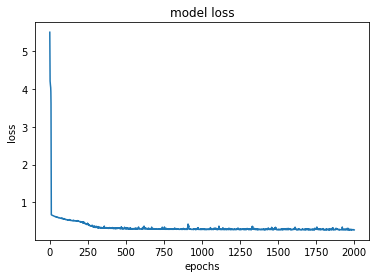

In [10]:
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(history.epoch, history.history.get('loss'))

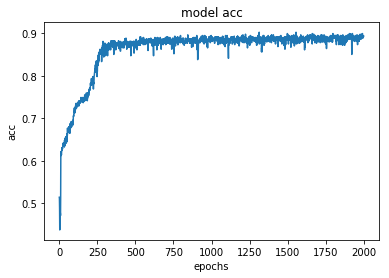

In [11]:
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.plot(history.epoch, history.history.get('acc'))

In [25]:
x = data.iloc[1, :-1].to_list()
x = [x]

In [26]:
model.predict(x)

array([[0.08549523]], dtype=float32)